# Mandarory Exercise: Parsing
Statement:
* Consider the following sentence: Lazy cats play with mice.
* Expand the grammar of the example related to non-probabilistic chart parsers in order to subsume this new sentence.
* Perform the constituency parsing using a BottomUpChartParser, a BottomUpLeftCornerChartParser and a LeftCornerChartParser.
* For each one of them, provide the resulting tree, the number of edges and the list of explored edges.
* Which parser is the most efficient for parsing the sentence?
* Which edges are filtered out by each parser and why?

In [45]:
import nltk
from nltk import CFG, ChartParser
from nltk import TopDownChartParser, BottomUpChartParser, BottomUpLeftCornerChartParser, LeftCornerChartParser

In [42]:
sentence = 'Lazy cats play with mice'
sentence = sentence.lower().split()

grammar = CFG.fromstring('''
 S -> NP VP | JJ NNS VP
 NP -> NNS | JJ NNS | NP CC NP
 VP -> V PP | V PREP NP 
 PP -> PREP NP
 NNS -> "cats" | "dogs" |"mice" | NNS CC NNS
 JJ -> "big" | "small" | "lazy"
 CC -> "and" | "or" 
 PREP -> "with"
 V -> "play"
''')
parser = TopDownChartParser(grammar)
parsed = parser.parse(sentence)

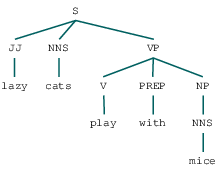

In [37]:
ts = []
for t in parsed:
    ts.append(t)
ts[0]

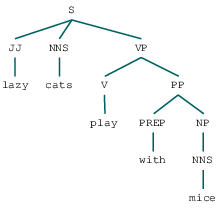

In [46]:
parser_BottomUP = BottomUpChartParser(grammar)
parsed_BottomUP = parser_BottomUP.parse(sentence)
ts_b = []
for t in parsed_BottomUP:
    ts_b.append(t)
ts_b[0]

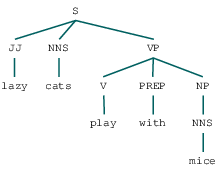

In [49]:
parser_BottomUP_Left = BottomUpLeftCornerChartParser(grammar)
parsed_BottomUP_Left = parser_BottomUP_Left.parse(sentence)
ts_b_l = []
for t in parsed_BottomUP_Left:
    ts_b_l.append(t)
ts_b_l[0]

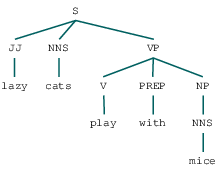

In [50]:
parser_Left = LeftCornerChartParser(grammar)
parsed_Left = parser_Left.parse(sentence)
ts_l = []
for t in parsed_Left:
    ts_l.append(t)
ts_l[0]

for the pract work: 
Sagae and Gordon 09
Collins and duffy 02